# 20 Pandas Functions That Will Boost Your Data Analysis Process - Soner Yıldırım

Original source - https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05

Topics covered
1. Query
2. Insert
3. Cumsum
4. Sample
5. Where
6. Isin
7. Loc and iloc
8. Pct_change
9. Rank
10. Melt
11. Explode
12. Nunique
13. Lookup
14. Infer_objects
15. Memory_usage
16. Describe
17. Merge
18. Select_dtypes
19. Replace
20. Applymap

In [1]:
import numpy as np
import pandas as pd

## 1. Query

Create sample DF by masking

In [2]:
values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)

years = np.arange(2010,2020)

groups = ['A','A','B','A','B','B','C','A','C','C']

df = pd.DataFrame({'group':groups, 'year':years, 
                   'value_1':values_1, 'value_2':values_2})

df

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,4,3
2,B,2012,5,9
3,A,2013,2,2
4,B,2014,6,1
5,B,2015,4,9
6,C,2016,5,9
7,A,2017,0,1
8,C,2018,5,9
9,C,2019,8,2


In [3]:
df.query('value_1 < value_2')

,group,year,value_1,value_2
0,A,2010,5,6
2,B,2012,5,9
5,B,2015,4,9
6,C,2016,5,9
7,A,2017,0,1
8,C,2018,5,9


In [4]:
df.query("group == 'A'" )

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,4,3
3,A,2013,2,2
7,A,2017,0,1


In [5]:
df.query('value_1 <= 5')

,group,year,value_1,value_2
0,A,2010,5,6
1,A,2011,4,3
2,B,2012,5,9
3,A,2013,2,2
5,B,2015,4,9
6,C,2016,5,9
7,A,2017,0,1
8,C,2018,5,9


In [6]:
df.query('group == "A" and value_1 >= 5')

,group,year,value_1,value_2
0,A,2010,5,6


## 2. Insert

add new column at any desired position

In [7]:
newCol = np.random.randn(10)

df.insert(2, "New_col_name", newCol)

In [8]:
df

,group,year,New_col_name,value_1,value_2
0,A,2010,-1.636463,5,6
1,A,2011,0.235910,4,3
2,B,2012,-0.066458,5,9
3,A,2013,0.384779,2,2
4,B,2014,1.337559,6,1
5,B,2015,-0.303169,4,9
6,C,2016,-1.195790,5,9
7,A,2017,-0.801704,0,1
8,C,2018,0.788711,5,9
9,C,2019,-0.854332,8,2


In [9]:
#column rename
df.rename(columns={"New_col_name": "value_0"}, inplace=True)

In [10]:
df

,group,year,value_0,value_1,value_2
0,A,2010,-1.636463,5,6
1,A,2011,0.235910,4,3
2,B,2012,-0.066458,5,9
3,A,2013,0.384779,2,2
4,B,2014,1.337559,6,1
5,B,2015,-0.303169,4,9
6,C,2016,-1.195790,5,9
7,A,2017,-0.801704,0,1
8,C,2018,0.788711,5,9
9,C,2019,-0.854332,8,2


## 3. Cumsum

we will apply 'groupby' and then apply 'cumsum'

In [11]:
df["cummulative"] = df[['value_2','group']].groupby('group').cumsum()
df

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-1.636463,5,6,6
1,A,2011,0.235910,4,3,9
2,B,2012,-0.066458,5,9,9
3,A,2013,0.384779,2,2,11
4,B,2014,1.337559,6,1,10
5,B,2015,-0.303169,4,9,19
6,C,2016,-1.195790,5,9,9
7,A,2017,-0.801704,0,1,12
8,C,2018,0.788711,5,9,18
9,C,2019,-0.854332,8,2,20


In [12]:
df[['value_0','value_1','value_2','group']].groupby('group').cumsum()

,value_0,value_1,value_2
0,-1.636463,5,6
1,-1.400553,9,9
2,-0.066458,5,9
3,-1.015775,11,11
4,1.271102,11,10
5,0.967933,15,19
6,-1.195790,5,9
7,-1.817478,11,12
8,-0.407079,10,18
9,-1.261411,18,20


In [13]:
df[['value_0','value_1','value_2','group']].groupby('group').sum()

,value_0,value_1,value_2
group,,,
A,-1.817478,11,12
B,0.967933,15,19
C,-1.261411,18,20


In [14]:
df[['value_0','value_1','value_2','group']].groupby('group').mean()

,value_0,value_1,value_2
group,,,
A,-0.454370,2.75,3.000000
B,0.322644,5.00,6.333333
C,-0.420470,6.00,6.666667


In [15]:
df[['value_0','value_1','value_2','group']].groupby('group').median()

,value_0,value_1,value_2
group,,,
A,-0.282897,3.0,2.5
B,-0.066458,5.0,9.0
C,-0.854332,5.0,9.0


A         AxesSubplot(0.1,0.559091;0.363636x0.340909)
B    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
C             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

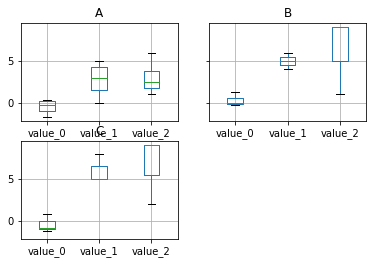

In [16]:
df[['value_0','value_1','value_2','group']].groupby('group').boxplot()

group
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

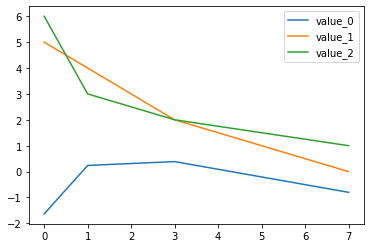

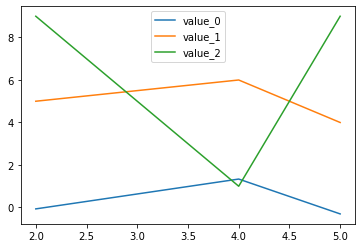

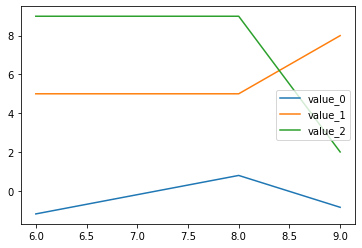

In [17]:
df[['value_0','value_1','value_2','group']].groupby('group').plot()

## 4. Sample

In [18]:
sample1 = df.sample(n=3)
sample1

,group,year,value_0,value_1,value_2,cummulative
3,A,2013,0.384779,2,2,11
1,A,2011,0.235910,4,3,9
9,C,2019,-0.854332,8,2,20


In [19]:
df.sample(n=3)

,group,year,value_0,value_1,value_2,cummulative
3,A,2013,0.384779,2,2,11
6,C,2016,-1.195790,5,9,9
0,A,2010,-1.636463,5,6,6


In [20]:
df.sample(n=3)

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-1.636463,5,6,6
9,C,2019,-0.854332,8,2,20
2,B,2012,-0.066458,5,9,9


In [21]:
df.sample(frac=0.4)

,group,year,value_0,value_1,value_2,cummulative
4,B,2014,1.337559,6,1,10
6,C,2016,-1.195790,5,9,9
0,A,2010,-1.636463,5,6,6
8,C,2018,0.788711,5,9,18


In [22]:
df.sample(frac=0.74)

,group,year,value_0,value_1,value_2,cummulative
7,A,2017,-0.801704,0,1,12
4,B,2014,1.337559,6,1,10
1,A,2011,0.235910,4,3,9
2,B,2012,-0.066458,5,9,9
3,A,2013,0.384779,2,2,11
8,C,2018,0.788711,5,9,18
5,B,2015,-0.303169,4,9,19


## 5. Where

Replace values based on some conditions. If condition fails by default it adds NaN else we can add any other value.

Note: numpy and panda have same usage of where function but differnt syntax

In [23]:
df['value_0'].where(df['value_0'] >0 , 0)

0    0.000000
1    0.235910
2    0.000000
3    0.384779
4    1.337559
5    0.000000
6    0.000000
7    0.000000
8    0.788711
9    0.000000
Name: value_0, dtype: float64

In [24]:
df['value_0'].where(df['value_0'] >0 , "Cool this is dope")

0    Cool this is dope
1              0.23591
2    Cool this is dope
3             0.384779
4              1.33756
5    Cool this is dope
6    Cool this is dope
7    Cool this is dope
8             0.788711
9    Cool this is dope
Name: value_0, dtype: object

In [25]:
np.where(df['value_0'] > 0, df['value_0'], 0)

array([0.        , 0.23590968, 0.        , 0.38477855, 1.33755937,
       0.        , 0.        , 0.        , 0.78871125, 0.        ])

In [26]:
np.where(df['value_0'] > 0, df['value_0'],"Where am I")

array(['Where am I', '0.23590967592181314', 'Where am I',
       '0.38477854539951856', '1.337559365235675', 'Where am I',
       'Where am I', 'Where am I', '0.7887112469229922', 'Where am I'],
      dtype='<U32')

## 6. Isin

In [27]:
years = ['2014', '2017', '2018']
df[df.year.isin(years)]

,group,year,value_0,value_1,value_2,cummulative
4,B,2014,1.337559,6,1,10
7,A,2017,-0.801704,0,1,12
8,C,2018,0.788711,5,9,18


In [28]:
years = np.arange(2011,2017)
df[df.year.isin(years)]

,group,year,value_0,value_1,value_2,cummulative
1,A,2011,0.235910,4,3,9
2,B,2012,-0.066458,5,9,9
3,A,2013,0.384779,2,2,11
4,B,2014,1.337559,6,1,10
5,B,2015,-0.303169,4,9,19
6,C,2016,-1.195790,5,9,9


In [29]:
years = np.arange(2011,2017)
groups = ["A","C"]
df[df.year.isin(years) & df.group.isin(groups)]

,group,year,value_0,value_1,value_2,cummulative
1,A,2011,0.235910,4,3,9
3,A,2013,0.384779,2,2,11
6,C,2016,-1.195790,5,9,9


## 7. Loc and iloc

In [30]:
df.iloc[:3,:2]

,group,year
0,A,2010
1,A,2011
2,B,2012


In [31]:
df.iloc[:3,:]

,group,year,value_0,value_1,value_2,cummulative
0,A,2010,-1.636463,5,6,6
1,A,2011,0.235910,4,3,9
2,B,2012,-0.066458,5,9,9


In [32]:
df.iloc[:,2:]

,value_0,value_1,value_2,cummulative
0,-1.636463,5,6,6
1,0.235910,4,3,9
2,-0.066458,5,9,9
3,0.384779,2,2,11
4,1.337559,6,1,10
5,-0.303169,4,9,19
6,-1.195790,5,9,9
7,-0.801704,0,1,12
8,0.788711,5,9,18
9,-0.854332,8,2,20


In [33]:
df.iloc[5:7,2:4]

,value_0,value_1
5,-0.303169,4
6,-1.195790,5


In [34]:
df.iloc[5:8,2:5]

,value_0,value_1,value_2
5,-0.303169,4,9
6,-1.195790,5,9
7,-0.801704,0,1


In [35]:
df.iloc[5:5,2:5]

,value_0,value_1,value_2


In [36]:
df.iloc[5:6,2:5]

,value_0,value_1,value_2
5,-0.303169,4,9


In [37]:
df.loc[:,["group"]]

,group
0,A
1,A
2,B
3,A
4,B
5,B
6,C
7,A
8,C
9,C


In [38]:
df.loc[1:5,["group"]]

,group
1,A
2,B
3,A
4,B
5,B


In [39]:
df.loc[1:5,["group", "value_1"]]

,group,value_1
1,A,4
2,B,5
3,A,2
4,B,6
5,B,4


In [40]:
df.loc[1:5,["group", "value_1",'cummulative']]

,group,value_1,cummulative
1,A,4,9
2,B,5,9
3,A,2,11
4,B,6,10
5,B,4,19


In [43]:
df.loc[[0,2,3,7,8],["group", "value_1",'cummulative']]

,group,value_1,cummulative
0,A,5,6
2,B,5,9
3,A,2,11
7,A,0,12
8,C,5,18


## 8. Pct_change

percentage change in values of series

In [47]:
df.value_1.pct_change()

0         NaN
1   -0.200000
2    0.250000
3   -0.600000
4    2.000000
5   -0.333333
6    0.250000
7   -1.000000
8         inf
9    0.600000
Name: value_1, dtype: float64

In [45]:
df.value_0.pct_change()

0         NaN
1   -1.144158
2   -1.281708
3   -6.789822
4    2.476180
5   -1.226658
6    2.944305
7   -0.329561
8   -1.983794
9   -2.083200
Name: value_0, dtype: float64

## 9. Rank

In [48]:
df["rank_0"] = df["value_0"].rank()
df

,group,year,value_0,value_1,value_2,cummulative,rank_0
0,A,2010,-1.636463,5,6,6,1.0
1,A,2011,0.235910,4,3,9,7.0
2,B,2012,-0.066458,5,9,9,6.0
3,A,2013,0.384779,2,2,11,8.0
4,B,2014,1.337559,6,1,10,10.0
5,B,2015,-0.303169,4,9,19,5.0
6,C,2016,-1.195790,5,9,9,2.0
7,A,2017,-0.801704,0,1,12,4.0
8,C,2018,0.788711,5,9,18,9.0
9,C,2019,-0.854332,8,2,20,3.0


In [49]:
rank_1 = df["value_1"].rank()
df.insert(4, "rank_1", rank_1)

In [50]:
df

,group,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
0,A,2010,-1.636463,5,6.5,6,6,1.0
1,A,2011,0.235910,4,3.5,3,9,7.0
2,B,2012,-0.066458,5,6.5,9,9,6.0
3,A,2013,0.384779,2,2.0,2,11,8.0
4,B,2014,1.337559,6,9.0,1,10,10.0
5,B,2015,-0.303169,4,3.5,9,19,5.0
6,C,2016,-1.195790,5,6.5,9,9,2.0
7,A,2017,-0.801704,0,1.0,1,12,4.0
8,C,2018,0.788711,5,6.5,9,18,9.0
9,C,2019,-0.854332,8,10.0,2,20,3.0


## 10. Melt

In [51]:
df.columns

Index(['group', 'year', 'value_0', 'value_1', 'rank_1', 'value_2',
       'cummulative', 'rank_0'],
      dtype='object')

In [54]:
df[['group', 'value_0', 'value_1', 'value_2']]

,group,value_0,value_1,value_2
0,A,-1.636463,5,6
1,A,0.235910,4,3
2,B,-0.066458,5,9
3,A,0.384779,2,2
4,B,1.337559,6,1
5,B,-0.303169,4,9
6,C,-1.195790,5,9
7,A,-0.801704,0,1
8,C,0.788711,5,9
9,C,-0.854332,8,2


In [55]:
df[['group', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group'])

,group,variable,value
0,A,value_0,-1.636463
1,A,value_0,0.235910
2,B,value_0,-0.066458
3,A,value_0,0.384779
4,B,value_0,1.337559
5,B,value_0,-0.303169
6,C,value_0,-1.195790
7,A,value_0,-0.801704
8,C,value_0,0.788711
9,C,value_0,-0.854332


In [56]:
df[['group','year', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group'])

,group,variable,value
0,A,year,2010.000000
1,A,year,2011.000000
2,B,year,2012.000000
3,A,year,2013.000000
4,B,year,2014.000000
5,B,year,2015.000000
6,C,year,2016.000000
7,A,year,2017.000000
8,C,year,2018.000000
9,C,year,2019.000000


In [57]:
df[['group','year', 'value_0', 'value_1', 'value_2']].melt(id_vars=['group', 'year'])

,group,year,variable,value
0,A,2010,value_0,-1.636463
1,A,2011,value_0,0.235910
2,B,2012,value_0,-0.066458
3,A,2013,value_0,0.384779
4,B,2014,value_0,1.337559
5,B,2015,value_0,-0.303169
6,C,2016,value_0,-1.195790
7,A,2017,value_0,-0.801704
8,C,2018,value_0,0.788711
9,C,2019,value_0,-0.854332


## 11. Explode

In [68]:
df1 = pd.DataFrame({'ID': ["a", "b", "c"], 'measurement': [4, 6,[2,3,8]],"day":[1,1,1]})

In [69]:
df1

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,"[2, 3, 8]",1


In [70]:
df1.explode('measurement')

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
2,c,3,1
2,c,8,1


In [71]:
df1.explode('measurement').reset_index(drop=True)

,ID,measurement,day
0,a,4,1
1,b,6,1
2,c,2,1
3,c,3,1
4,c,8,1


## 12. Nunique

In [73]:
df.year.nunique()

10

In [75]:
df.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [76]:
df.group.nunique()

3

In [78]:
df.group.value_counts()

A    4
B    3
C    3
Name: group, dtype: int64

In [83]:
df.groupby("group").mean()

,year,value_0,value_1,rank_1,value_2,cummulative,rank_0
group,,,,,,,
A,2012.750000,-0.454370,2.75,3.250000,3.000000,9.500000,5.000000
B,2013.666667,0.322644,5.00,6.333333,6.333333,12.666667,7.000000
C,2017.666667,-0.420470,6.00,7.666667,6.666667,15.666667,4.666667


## 13. Lookup